In [1]:
import pandas as pd
import numpy as np

In [2]:
linear_df = pd.read_csv("../data/linear_data.csv")
linear_df.head()

gender  age  married  number_of_dependents  zip_code  population  \
0       1   78        0                     0     90022       68701   
1       0   74        1                     1     90063       55668   
2       1   71        0                     3     90065       47534   
3       0   78        1                     1     90303       27778   
4       0   80        1                     1     90602       26265   

   tenure_in_months  phone_service  avg_monthly_long_distance_charges  \
0                 1              0                               0.00   
1                 8              1                              48.85   
2                18              1                              11.33   
3                25              1                              19.76   
4                37              1                               6.33   

   multiple_lines  ...  satisfaction_score  churn_label  cltv  \
0               0  ...                   3            1  5433   
1               1  ...                   3            1  5302   
2               1  ...                   2            1  3179   
3               0  ...                   2            1  5337   
4               1  ...                   2            1  2793   

   internet_type_DSL  internet_type_Fiber Optic  internet_type_No Internet  \
0               True                      False                      False   
1              False                       True                      False   
2              False                       True                      False   
3              False                       True                      False   
4              False                       True                      False   

   contract_One Year  contract_Two Year  payment_method_Credit Card  \
0              False              False                       False   
1              False              False                        True   
2              False              False                       False   
3              False              False                       False   
4              False              False                       False   

   payment_method_Mailed Check  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False  

[5 rows x 37 columns]

In [3]:
linear_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             7043 non-null   int64  
 1   age                                7043 non-null   int64  
 2   married                            7043 non-null   int64  
 3   number_of_dependents               7043 non-null   int64  
 4   zip_code                           7043 non-null   int64  
 5   population                         7043 non-null   int64  
 6   tenure_in_months                   7043 non-null   int64  
 7   phone_service                      7043 non-null   int64  
 8   avg_monthly_long_distance_charges  7043 non-null   float64
 9   multiple_lines                     7043 non-null   int64  
 10  internet_service                   7043 non-null   int64  
 11  avg_monthly_gb_download            7043 non-null   int64

## Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

# separate the features and target
X = linear_df.drop("churn_label", axis=1)
y = linear_df["churn_label"]

# stratify ensures same class distribution in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

# check class balance in the training set
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("\nTesting set class distribution:\n", y_test.value_counts(normalize=True))

Training set class distribution:
 churn_label
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Testing set class distribution:
 churn_label
0    0.734564
1    0.265436
Name: proportion, dtype: float64


**Insights:**
- The original class imbalance has been preserved accurately across the split.

In [6]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Showing the original class counts
print("Original class distribution:", Counter(y_train))

Original class distribution: Counter({0: 4139, 1: 1495})


## Random Undersampling

In [8]:
under_sample = RandomUnderSampler(random_state=42)
X_train_under_sample, y_train_under_sample = under_sample.fit_resample(X_train, y_train)

print("Undersampled class distribution:", Counter(y_train_under_sample))

Undersampled class distribution: Counter({0: 1495, 1: 1495})


**Insight:** Lost 2644 data points under label 0

## Random Oversampling

In [12]:
over_sample = RandomOverSampler(random_state=42)
X_train_over_sample, y_train_over_sample = over_sample.fit_resample(X_train, y_train)

print("Oversampled class distribution:", Counter(y_train_over_sample))

Oversampled class distribution: Counter({0: 4139, 1: 4139})


**Insight:** Added 2644 new data points for label 1

### Visual representation of Undersample and Oversample

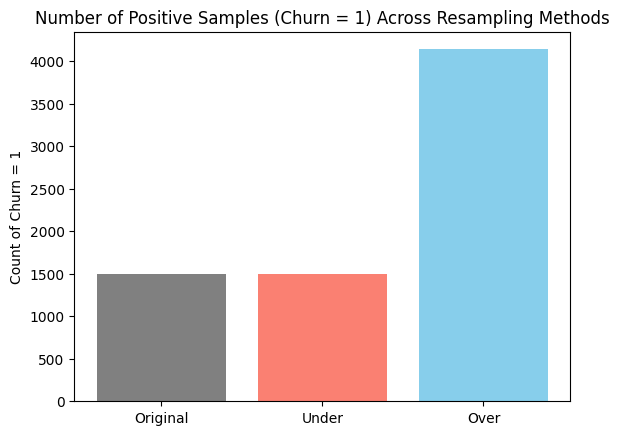

In [13]:
import matplotlib.pyplot as plt

# plot for comparison
labels = ["Original", "Under", "Over"]
counts = [
    Counter(y_train)[1],
    Counter(y_train_under_sample)[1],
    Counter(y_train_over_sample)[1]
]

plt.bar(labels, counts, color=["gray", "salmon", "skyblue"])
plt.title("Number of Positive Samples (Churn = 1) Across Resampling Methods")
plt.ylabel("Count of Churn = 1")
plt.show()

## Synthetic Minority Over-Sampling Technique (SMOTE)

In [14]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# create a SMOTE object
smote = SMOTE(random_state=42)

# apply only to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# check the new class balance
print("After Smote:", Counter(y_train_smote))

After Smote: Counter({0: 4139, 1: 4139})


## Saving the balanced dataset

In [15]:
# merging the features + target to save
X_train_smote['churn_label'] = y_train_smote

output_path = "../data/train_smote_balanced.csv"
X_train_smote.to_csv(output_path, index=False)

## Saving the untouched test dataset

In [16]:
X_test['churn_label'] = y_test

output_path_test = "../data/test_unbalanced.csv"
X_test.to_csv(output_path_test, index=False)